# Regressão 

# Aula 04-03-2021

In [2]:
import pandas as pd
df = pd.read_csv('dados\data.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [3]:
#### Verifica se tem duplicatas no Dataframe ###3
df[df.duplicated()]

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [4]:
### Remova as duplicatas  ####

df.drop_duplicates(inplace=True)

In [5]:
df.shape

(162, 4)

In [6]:
### Reset_index #### 
#Colocar os indices novamente 

df.reset_index(drop=True)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
157,60,105,140,290.8
158,60,110,145,300.0
159,60,115,145,310.2
160,75,120,150,320.4


In [7]:
### Verifica se tem valores nulos na tabela ###
df.isnull().sum().sort_values(ascending=False)

Calories    5
Maxpulse    0
Pulse       0
Duration    0
dtype: int64

In [8]:
df.info()# Observe a coluna Calories, ela não tem 162 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.3 KB


Verificar o tipo da coluna Calories

In [9]:
df[["Calories"]].dtypes
# tambem pode ser assim
df.Calories.map(type)

0      <class 'float'>
1      <class 'float'>
2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
            ...       
164    <class 'float'>
165    <class 'float'>
166    <class 'float'>
167    <class 'float'>
168    <class 'float'>
Name: Calories, Length: 162, dtype: object

## Visualizar um dataframe somente com os NaN

In [10]:
### Visualiza a coluna Calories #####
df[df.Calories.isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


## Susbtituir os NAs para fazer Análise de Regressão:
Como se trata somente dois variaveis de duração 45 e 60
-Faremos uma média para cada um 

### Duration=45

In [11]:
#### Substituir pela média ##### 
avg_45 = df[df.Duration==45].Calories.mean()
avg_45

277.7870967741935

In [12]:
avg_60 = df[df.Duration==60].Calories.mean()
avg_60

340.2704225352114

# Substituindo com média usando o loc

Dentro do loc colocar as condições

In [13]:
df.loc[(df.Calories.isna()) & (df.Duration==60),'Calories'] = avg_60

In [14]:
df.loc[(df.Calories.isna()) & (df.Duration==45),'Calories'] = avg_45

In [15]:
df[df.Calories.isnull()]

,Duration,Pulse,Maxpulse,Calories


## Para visualizar o dataframe

<AxesSubplot:>

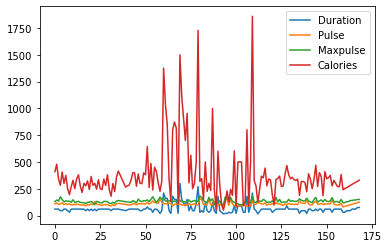

In [16]:
## Visualização do DataFrame ###### 
df.plot()

### Para visualizar uma coluna 

<AxesSubplot:>

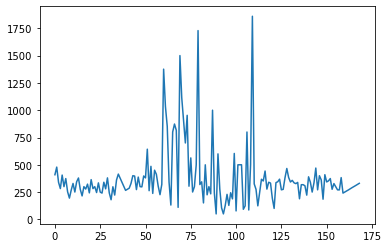

In [17]:
df.Calories.plot()

### Regressão Linear #####

#### Coeficiente de Determinação (R-squared) : 

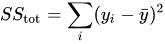
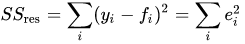
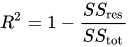

#### Mean squared error :

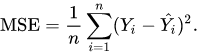

 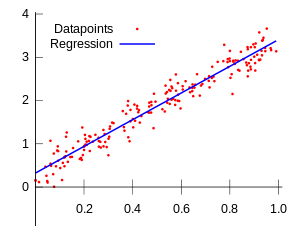

In [18]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435095
std,43.151882,14.711588,16.471618,267.381894
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


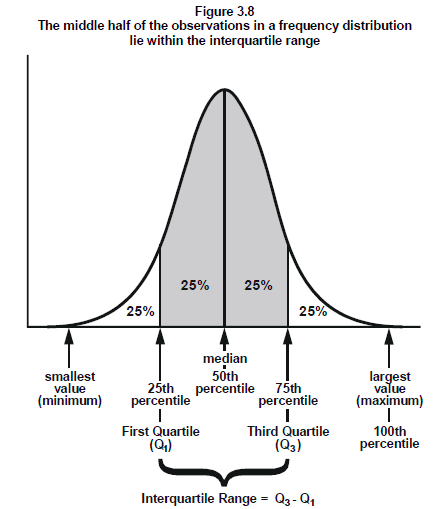

In [19]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019258
Maxpulse,0.003578,0.787035,1.000000,0.197465
Calories,0.923190,0.019258,0.197465,1.000000


## Coeficiente de Person e P-value

 O codigo ```stats.pearsonr``` apresenta tanto o coefciente de correlação ou de Person quanto o P-value

In [20]:
### P-Values
from scipy import stats
import numpy as np 

pearson_coef, p_value = stats.pearsonr(df['Duration'], df['Calories'])

print("O coeficiente de correlação de Pearson é:", pearson_coef, " com um valor de P-value =", p_value) 

O coeficiente de correlação de Pearson é: 0.923189943209421  com um valor de P-value = 2.447193062825005e-68


In [21]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [22]:
coef=stats.pearsonr(df['Duration'], df['Calories'])
coef

(0.923189943209421, 2.447193062825005e-68)

In [23]:
#### Visualizar Duration x Calories 

# Não rodou 

#df.plot(Kind='scatter',x='Duration',y='Calories')

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm=LinearRegression()
lm

LinearRegression()

In [26]:
### Definir as Variáveis X e Y 
x = df[["Duration"]]
y = df[["Calories"]]

## Ajustando o modelo, implementando o modelo 

In [27]:
### Acha a reta que melhor descreve a distribuição dos dados 

lm.fit(x,y)

LinearRegression()

In [28]:
### Usa o modelo para predição #### 
estimativa= lm.predict(x)
estimativa[0:5]

array([[353.42371042],
       [353.42371042],
       [353.42371042],
       [267.61831984],
       [267.61831984]])

## Avaliando o modelo com R^2 e o MSE

In [29]:
### R-squared #####

rquadrado=lm.score(x,y)

print("O R-square é :", rquadrado)


O R-square é : 0.8522796712430143


Para o MSE precisa carregar o pacote 
Mean Squared Error

In [30]:

from sklearn.metrics import mean_squared_error

# ?mean_squared_error

erro=mean_squared_error(x,estimativa)

#print('O erro quadrático médio de calorias e valor previsto é: ', erro)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

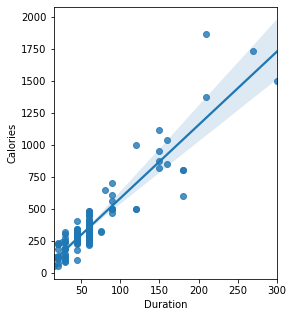

In [32]:
width = 4
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=df)


C:\Users\edlai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


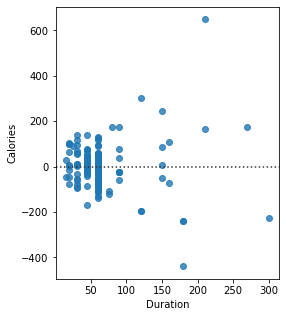

In [33]:
#width = 12
#height = 10
plt.figure(figsize=(width, height))
x =df['Duration']
y = df['Calories']
sns.residplot(x,y)
plt.show()

# Aula 05-03-2021

In [34]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435095
std,43.151882,14.711588,16.471618,267.381894
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


In [35]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019258
Maxpulse,0.003578,0.787035,1.000000,0.197465
Calories,0.923190,0.019258,0.197465,1.000000


In [36]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Duration'], df['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.923189943209421  with a P-value of P = 2.447193062825005e-68


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [39]:
X = df[['Duration']]
Y = df[['Calories']]

In [40]:
lr.fit(X,Y)

LinearRegression()

In [41]:
Yhat = lr.predict(X)
Yhat[0:5]

array([[353.42371042],
       [353.42371042],
       [353.42371042],
       [267.61831984],
       [267.61831984]])

In [42]:

### R-squared #####
print('The R-square is: ', lr.score(X, Y))


The R-square is:  0.8522796712430143


In [43]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  10495.789626824871


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

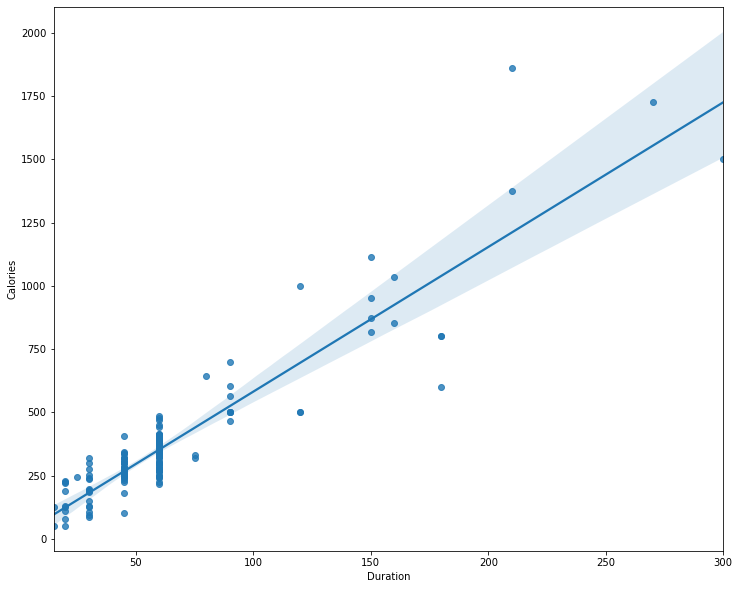

In [44]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=df)

In [45]:
Xm = df[['Duration','Maxpulse']]
Y = df[['Calories']]

In [46]:
lr.fit(Xm,Y)

LinearRegression()

In [47]:
Yhat = lr.predict(Xm)

# Aula 08-03-2021

# Regressão Polinomial

In [48]:
Xp = df['Duration']
Y = df['Calories']
Xp

0      60
1      60
2      60
3      45
4      45
       ..
164    60
165    60
166    60
167    75
168    75
Name: Duration, Length: 162, dtype: int64

In [49]:
import numpy as np
f = np.polyfit(Xp, Y, 1)
p = np.poly1d(f)
print(p)

 
5.72 x + 10.2


In [50]:
np.polyfit(Xp, Y, 1)

array([ 5.72035937, 10.20214808])

In [51]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 300, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Calories ~ Duration')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Calories')

    plt.show()
    plt.close()

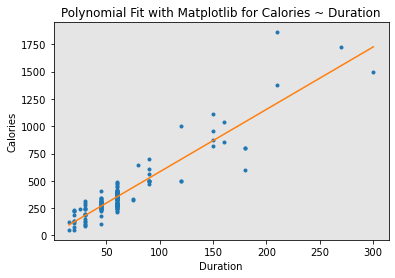

In [52]:
PlotPolly(p, Xp, Y, 'Duration')

In [53]:
from sklearn.metrics import r2_score

In [54]:
r_squared = r2_score(Y, p(Xp))
print('The R-square value is: ', r_squared)

The R-square value is:  0.8522796712430143


In [55]:
mean_squared_error(Y, p(Xp))

10495.789626824871

# FIM